In [1]:
# Dependencies
import pandas as pd
import requests
import json
import os
import csv
import prettyprint as pp
import matplotlib.pyplot as plt
# from apiclient import errors

# Google developer API key
from api_keys import gkey

In [2]:
world_happiness = "Selected_cities_2020.csv"
location_types = "Location_Types.csv"
world_happiness_df = pd.read_csv(world_happiness, encoding="UTF-8")
location_types_df = pd.read_csv(location_types, encoding="UTF-8")
 # base url
places_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

In [3]:
health_location_types = location_types_df.loc[location_types_df["sub_type"]
                                               =="Health",:]
health_types_list = []
health_location_types.reset_index(inplace=True)
for i in range(len(health_location_types)):
    health_types_list.append(health_location_types.loc[i,"location_types"])

health_types_list

['dentist', 'doctor', 'gym', 'hospital', 'pharmacy', 'physiotherapist']

In [4]:
base_url = "https://maps.googleapis.com/maps/api/geocode/json"
coord=[]
cities=["Helsinki","Stockholm","Washington D.C","Brussels","Montevideo","Bocharest", "Islamabad", "Accra","Bhagdad","Kampala","Gaborone"]
for city in cities:
    params = {"address": city, "key":gkey}
    response = requests.get(base_url, params=params)
    places_data = response.json()   
    lat=places_data["results"][0]["geometry"]["location"]["lat"]
    long=places_data["results"][0]["geometry"]["location"]["lng"]
    coord.append(f"{lat},{long}")
coord

['60.16985569999999,24.9383791',
 '59.32932349999999,18.0685808',
 '38.9071923,-77.0368707',
 '50.8503396,4.3517103',
 '-34.9011127,-56.16453139999999',
 '44.4267674,26.1025384',
 '33.6844202,73.04788479999999',
 '5.6037168,-0.1869644',
 '33.315241,44.3660671',
 '0.3475964,32.5825197',
 '-24.6282079,25.9231471']

In [5]:
#Use for loop to calculate hospitals

target_type ="hospital"
count_hospitals=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(places_url, params=params).json()
    count_hospitals.append(len(places_data["results"]))
    
count_hospitals

[2, 1, 2, 2, 6, 3, 0, 2, 1, 3, 1]

In [6]:
#Use for loop to calculate dentists

target_type ="dentist"
count_dentists=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(places_url, params=params).json()
    count_dentists.append(len(places_data["results"]))

count_dentists

[20, 20, 20, 8, 17, 18, 2, 4, 8, 4, 1]

In [7]:
health_types_list

['dentist', 'doctor', 'gym', 'hospital', 'pharmacy', 'physiotherapist']

In [8]:
#Use for loop to calculate doctors
target_type ="doctor"
count_doctors=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(places_url, params=params).json()
    count_doctors.append(len(places_data["results"]))

count_doctors

[20, 20, 20, 20, 20, 20, 7, 7, 20, 6, 5]

In [9]:
#Use for loop to calculate doctors
target_type ="gym"
count_gyms=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(places_url, params=params).json()
    count_gyms.append(len(places_data["results"]))

count_gyms

[20, 20, 20, 15, 20, 19, 4, 7, 3, 3, 1]

In [10]:

#Use for loop to calculate doctors
target_type ="pharmacy"
count_pharmacies=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(places_url, params=params).json()
    count_pharmacies.append(len(places_data["results"]))

count_pharmacies

[18, 20, 20, 20, 20, 20, 4, 11, 20, 8, 4]

In [11]:

#Use for loop to calculate doctors
target_type ="physiotherapist"
count_physio=[]

for lat in coord:
    params = {"location":lat,"key": gkey,"keyword":target_type, "radius":750}
    places_data = requests.get(places_url, params=params).json()
    count_physio.append(len(places_data["results"]))

    
count_physio

[10, 5, 16, 6, 0, 2, 0, 1, 0, 5, 2]

In [12]:

health_dict = {"Cities":cities,"Hospitals":count_hospitals,"Doctors":count_doctors,"Dentists":count_dentists,
              "Gyms":count_gyms,"Pharmacies":count_pharmacies,"Physiotherapists":count_physio}

health_data_df = pd.DataFrame(health_dict)
health_data_df

,Cities,Hospitals,Doctors,Dentists,Gyms,Pharmacies,Physiotherapists
0,Helsinki,2,20,20,20,18,10
1,Stockholm,1,20,20,20,20,5
2,Washington D.C,2,20,20,20,20,16
3,Brussels,2,20,8,15,20,6
4,Montevideo,6,20,17,20,20,0
5,Bocharest,3,20,18,19,20,2
6,Islamabad,0,7,2,4,4,0
7,Accra,2,7,4,7,11,1
8,Bhagdad,1,20,8,3,20,0
9,Kampala,3,6,4,3,8,5


In [13]:
#sum the totals of each row
sum_rows= health_data_df.sum(axis=1)


In [14]:
#Add to dataframe
health_data_df["Total"]=sum_rows
health_data_df

,Cities,Hospitals,Doctors,Dentists,Gyms,Pharmacies,Physiotherapists,Total
0,Helsinki,2,20,20,20,18,10,90
1,Stockholm,1,20,20,20,20,5,86
2,Washington D.C,2,20,20,20,20,16,98
3,Brussels,2,20,8,15,20,6,71
4,Montevideo,6,20,17,20,20,0,83
5,Bocharest,3,20,18,19,20,2,82
6,Islamabad,0,7,2,4,4,0,17
7,Accra,2,7,4,7,11,1,32
8,Bhagdad,1,20,8,3,20,0,52
9,Kampala,3,6,4,3,8,5,29


Text(0, 0.5, 'Score')

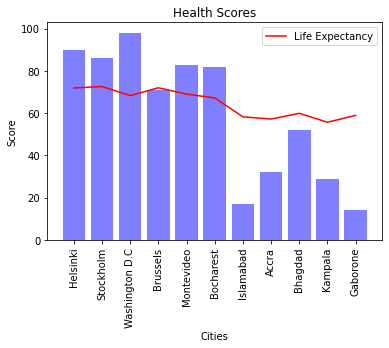

In [19]:
health_score = health_data_df["Total"]
x_cities = health_data_df["Cities"]
life_expectancy = world_happiness_df["Healthy life expectancy"]
plt.bar(x_cities,health_score,color="b",alpha=0.5,align="center")
plt.plot(x_cities,life_expectancy,color="r",label="Life Expectancy")
plt.legend(loc="upper right")
plt.xticks(rotation=90)
plt.title("Health Scores")
plt.xlabel("Cities")
plt.ylabel("Score")